# Machine Learning using Decisicon Trees

## Exericse I: Getting familiar with Colab Notebooks

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
plt.xkcd()

Populating the interactive namespace from numpy and matplotlib


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [ ]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0  66459      0 --:--:-- --:--:-- --:--:-- 66459


In [ ]:
import pandas as pd
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [ ]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [ ]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [ ]:
# we deliberately decide this is going to be our label, it is often called lower case y
y=df['group']

In [ ]:
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [ ]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns', inplace=True)

In [ ]:
df.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [ ]:
# input data often is named upper case X, the upper case indicates, that each row is a vector
X = df.as_matrix()

### We restrict ourselves to two dimensions for now

Because this is all we really can visualize in 2d

In [ ]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   size=(15, 8)):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=size)

    if clf:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)

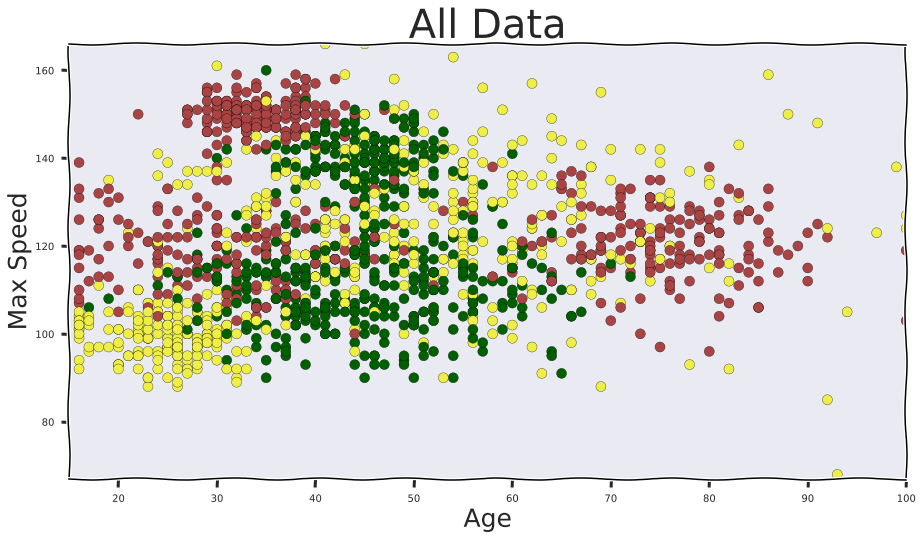

In [ ]:
plotPrediction(None, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="All Data")

In [ ]:
X[:, :2]

array([[ 98.,  44.],
       [118.,  54.],
       [111.,  26.],
       ...,
       [138.,  41.],
       [100.,  31.],
       [100.,  58.]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X[:, :2], y)

CPU times: user 2.69 ms, sys: 0 ns, total: 2.69 ms
Wall time: 2.69 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
input = [[100.0, 48.0]]
clf.predict(input)

array([1])

# Stop here

## Exercise II: Getting your feet wet fighting overfitting

## Second important concept: To have an idea how well the training worked, we save some data to test our model on previously unseen data. 

* The real objective is to have a generalized model that works well on the test data.
* How well it performs on this test data as opposed to the training data tells us quite a bit as well.
* Typical splits are 60% for training and 40% for testing or 80/20
* It is important that we do not use the test data to tweak the hyper parameters of our learning strategy - in this case the test data would (indirectly) influence the training and can no longer tell how well we did
* evaluate the test date set only once at the end of your experiment

<img src='https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/img/generalization.jpg'>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [ ]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

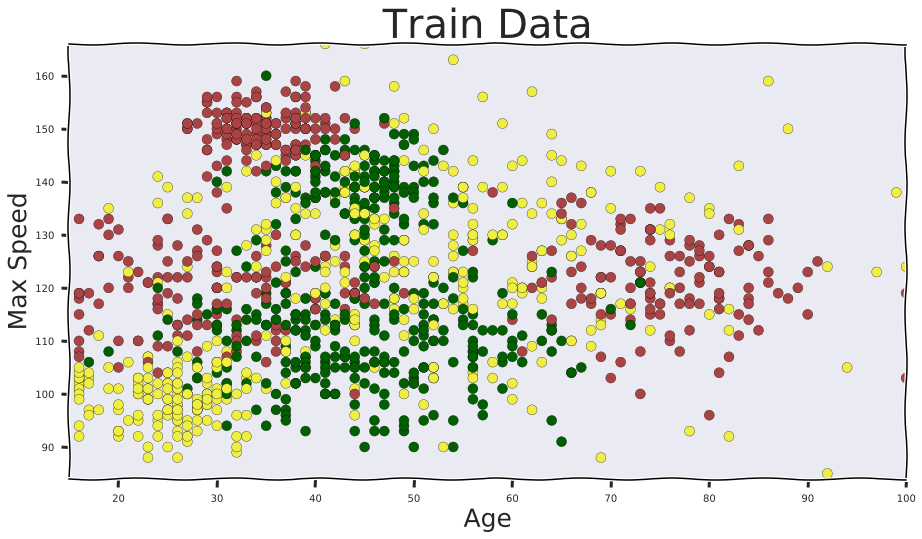

In [ ]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, title="Train Data")

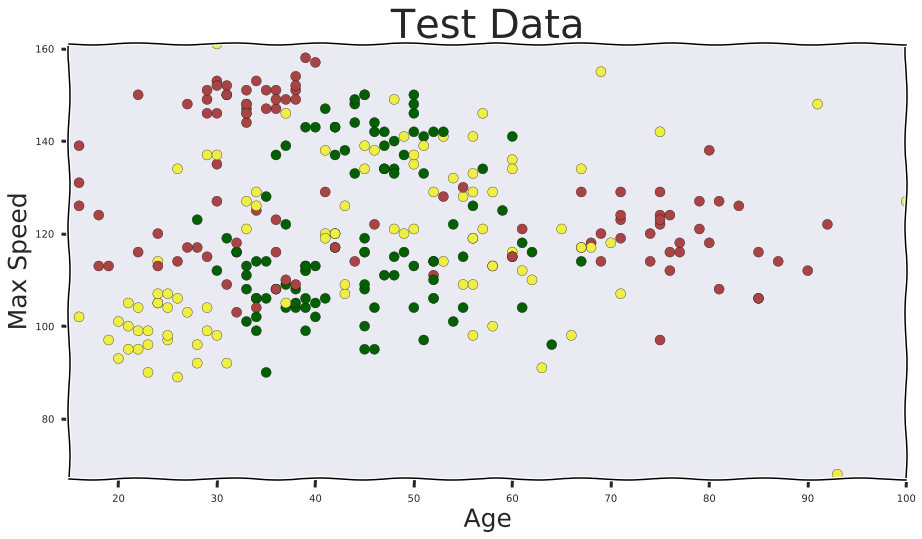

In [ ]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, title="Test Data")

### What is the best split?

* assign a category to each node containing a certain set of samples
* use a metric (Gini or Entropy) to decide how good a node would be based on that category
* sum up weighted metric for both child nodes
* optimize the split for that summed metric

https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/


In [ ]:
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 4.32 ms, sys: 0 ns, total: 4.32 ms
Wall time: 4.65 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# we perform at most 20 splits of our data until we make a decision where the data point belongs

clf.tree_.max_depth

18

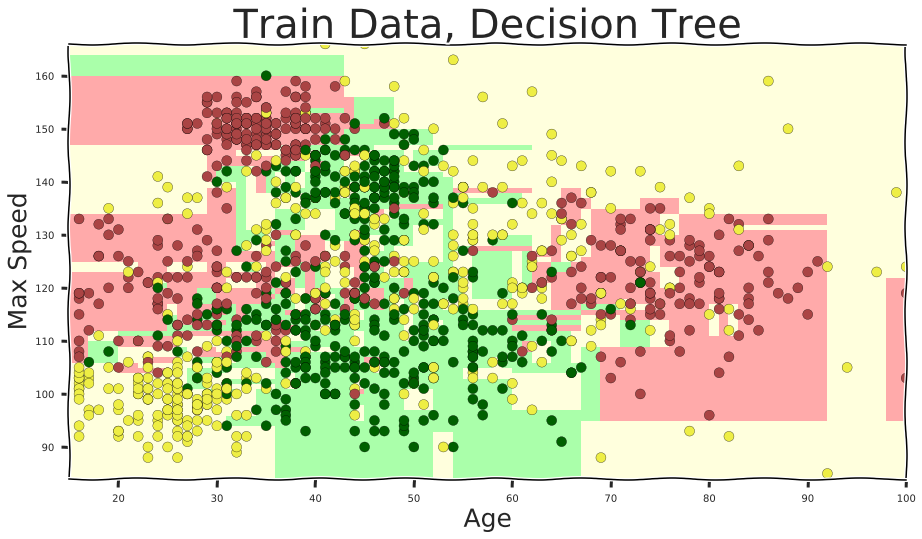

In [ ]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree")

In [ ]:
clf.score(X_train_2_dim, y_train)

0.9425

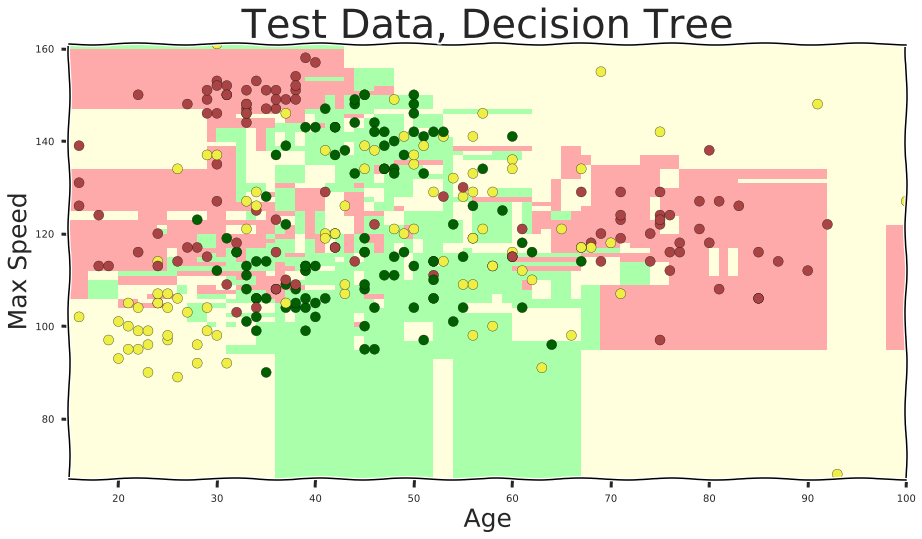

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree")

In [ ]:
clf.score(X_test_2_dim, y_test)

0.6

In [ ]:
clf = DecisionTreeClassifier(max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 2.46 ms, sys: 0 ns, total: 2.46 ms
Wall time: 2.46 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
clf.tree_.max_depth

10

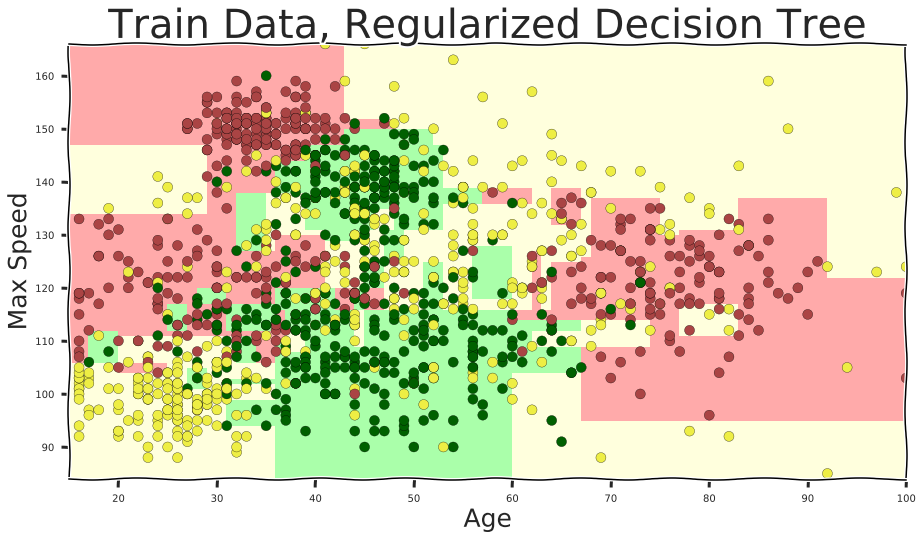

In [ ]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree")

In [ ]:
clf.score(X_train_2_dim, y_train)

0.8025

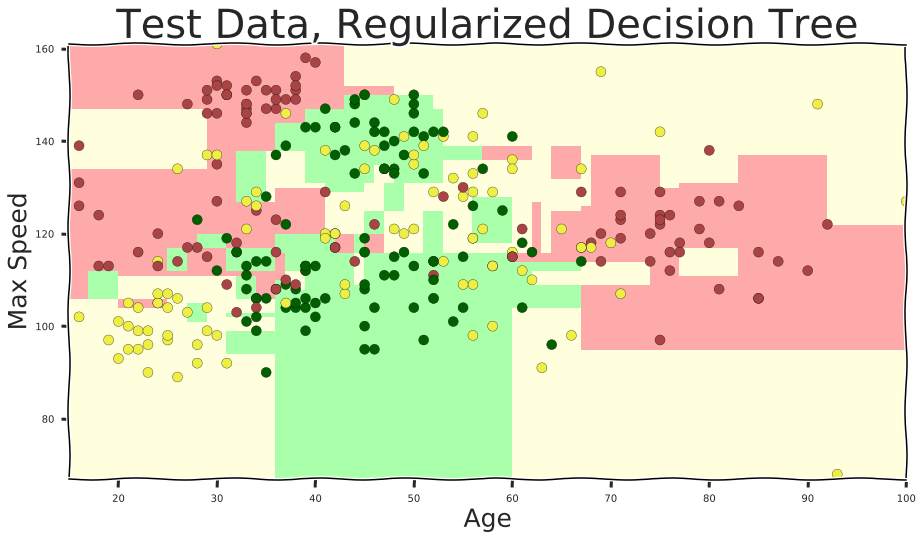

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree")

In [ ]:
clf.score(X_test_2_dim, y_test)

0.65

# STOP HERE 

## try to regularize model

In [ ]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.6506986, 0.646    , 0.6492986])

In [ ]:
# cross_val_score?

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.00)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X[:, :2], y)
clf.best_params_

CPU times: user 3.78 s, sys: 27.8 ms, total: 3.81 s
Wall time: 13.1 s


{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [ ]:
clf = DecisionTreeClassifier(max_depth=6,
                              min_samples_leaf=6,
                              min_samples_split=2)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 2.28 ms, sys: 1.06 ms, total: 3.34 ms
Wall time: 3.87 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
clf.score(X_train_2_dim, y_train)

0.7233333333333334

In [ ]:
clf.score(X_test_2_dim, y_test)

0.6633333333333333

In [ ]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X[:, :2], y, n_jobs=-1)
scores

array([0.67664671, 0.694     , 0.68537074])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.01)
